- Binary classification (Positive and Negative)
- Model used: Logistic Regression & Support Vector Machine (SVM)
- Dataset: IMBD Dataset (As of now)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk import tokenize
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

sns.set_style(style = 'darkgrid')

# Data Extraction

In [2]:
review_df = pd.read_csv('IMDB_Dataset_5000.csv')

In [3]:
review_df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
review_df.shape

(5000, 2)

We are going to use 10000 rows (50000 is too much as of now)

In [5]:
# review_df = review_df.sample(frac = 0.1, random_state = 42)
# review_df = review_df.reset_index(drop = True)

In [6]:
review_df.shape

(5000, 2)

In [7]:
review_df.dtypes

review       object
sentiment    object
dtype: object

In [8]:
# map sentiment strings to integers: positive -> 1, negative -> 0
review_df['sentiment'] = review_df['sentiment'].map({'positive': 1, 'negative': 0}).astype(int)

In [9]:
review_df['sentiment'].value_counts()

sentiment
0    2532
1    2468
Name: count, dtype: int64

# Exploratory Data Analysis & Data Engineering

In [10]:
length = len(review_df['review'][0]) # Check length for the first review
print(f"Length of a sample review: {length}")

Length of a sample review: 1761


In [11]:
review_df['Length'] = review_df['review'].str.len()
review_df.head(10)

,review,sentiment,Length
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production. <br /><br />The...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically there's a family where a little boy ...,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317
5,"Probably my all-time favorite movie, a story o...",1,656
6,I sure would like to see a resurrection of a u...,1,726
7,"This show was an amazing, fresh & innovative i...",0,934
8,Encouraged by the positive comments about this...,0,681
9,If you like original gut wrenching laughter yo...,1,176


Word count: Number of words in a review

In [12]:
word_count = review_df['review'][0].split() # Check word count for the first review
print(f"Word count in a sample review: {len(word_count)}")

Word count in a sample review: 307


In [13]:
def word_count(review_df):
    review_list = review_df.split()
    return len(review_list)

In [14]:
review_df['Word_count'] = review_df['review'].apply(word_count)
review_df.head(10)

,review,sentiment,Length,Word_count
0,One of the other reviewers has mentioned that ...,1,1761,307
1,A wonderful little production. <br /><br />The...,1,998,162
2,I thought this was a wonderful way to spend ti...,1,926,166
3,Basically there's a family where a little boy ...,0,748,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,230
5,"Probably my all-time favorite movie, a story o...",1,656,119
6,I sure would like to see a resurrection of a u...,1,726,150
7,"This show was an amazing, fresh & innovative i...",0,934,174
8,Encouraged by the positive comments about this...,0,681,130
9,If you like original gut wrenching laughter yo...,1,176,33


Mean word length: Average length of words

In [15]:
review_df['mean_word_length'] = review_df['review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
review_df.head(10)

,review,sentiment,Length,Word_count,mean_word_length
0,One of the other reviewers has mentioned that ...,1,1761,307,4.739414
1,A wonderful little production. <br /><br />The...,1,998,162,5.166667
2,I thought this was a wonderful way to spend ti...,1,926,166,4.584337
3,Basically there's a family where a little boy ...,0,748,138,4.427536
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,230,4.730435
5,"Probably my all-time favorite movie, a story o...",1,656,119,4.521008
6,I sure would like to see a resurrection of a u...,1,726,150,3.846667
7,"This show was an amazing, fresh & innovative i...",0,934,174,4.373563
8,Encouraged by the positive comments about this...,0,681,130,4.246154
9,If you like original gut wrenching laughter yo...,1,176,33,4.363636


Mean sentence length: Average length of the sentences in the review

In [16]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(review_df['review'][0])])

np.float64(175.2)

In [17]:
review_df['mean_sentence_length'] = review_df['review'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
review_df.head(10)

,review,sentiment,Length,Word_count,mean_word_length,mean_sentence_length
0,One of the other reviewers has mentioned that ...,1,1761,307,4.739414,175.200000
1,A wonderful little production. <br /><br />The...,1,998,162,5.166667,141.714286
2,I thought this was a wonderful way to spend ti...,1,926,166,4.584337,230.750000
3,Basically there's a family where a little boy ...,0,748,138,4.427536,123.833333
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,230,4.730435,145.444444
5,"Probably my all-time favorite movie, a story o...",1,656,119,4.521008,108.500000
6,I sure would like to see a resurrection of a u...,1,726,150,3.846667,726.000000
7,"This show was an amazing, fresh & innovative i...",0,934,174,4.373563,102.888889
8,Encouraged by the positive comments about this...,0,681,130,4.246154,96.428571
9,If you like original gut wrenching laughter yo...,1,176,33,4.363636,58.333333


## Term Frequency Analysis
- Term frequency measures how often a specific word appears in a document, indicating its importance within that text.

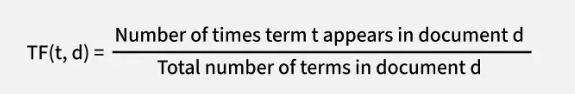

In [18]:
review_df = review_df.drop(['Length', 'Word_count', 'mean_word_length', 'mean_sentence_length'], axis = 1)

In [19]:
review_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [20]:
review_df.isnull().sum()

review       0
sentiment    0
dtype: int64

For Term Frequency Analysis, the following needs text data needs to be processed:
- Lowercase
- Remove punctuation
- Stopword removal

In [21]:
def clean(review):
    review = review.lower()
    review = review.replace('<br /><br />', ' ') # Replace HTML linebreak format with empty space
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review

In [22]:
review_df['review'] = review_df['review'].apply(clean)
review_df.head(10)

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter mattei love time money visually stunnin...,1
5,probably time favorite movie story selflessnes...,1
6,sure would like see resurrection dated seahunt...,1
7,show amazing fresh innovative idea first aired...,0
8,encouraged positive comments film looking forw...,0
9,like original gut wrenching laughter like movi...,1


~4 minutes to preprocess

In [23]:
review_df['review'][0]

'one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skill

In [24]:
def corpus(text):
    text_list = text.split()
    return text_list

In [25]:
review_df['Review_lists'] = review_df['review'].apply(corpus)
review_df.head()

,review,sentiment,Review_lists
0,one reviewers mentioned watching oz episode ho...,1,"[one, reviewers, mentioned, watching, oz, epis..."
1,wonderful little production filming technique ...,1,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,1,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,0,"[basically, family, little, boy, jake, thinks,..."
4,petter mattei love time money visually stunnin...,1,"[petter, mattei, love, time, money, visually, ..."


In [26]:
corpus = []
for i in range(review_df.shape[0]):
    review_string = " ".join(review_df['Review_lists'][i])
    corpus.append(review_string)
len(corpus)

5000

## Most Frequently occurring N-Grams
- n-gram is a sequence of n words in a text.
- A bigram means two words in a sequence. "Very good" or "Too great"".
- A trigram means three words in a sequence.
- Seperate text into n-grams using CountVectorizer.

In [27]:
cv = CountVectorizer(ngram_range = (2, 2))
bigrams =cv.fit_transform(review_df['review'])

In [28]:
count_values = bigrams.toarray().sum(axis = 0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

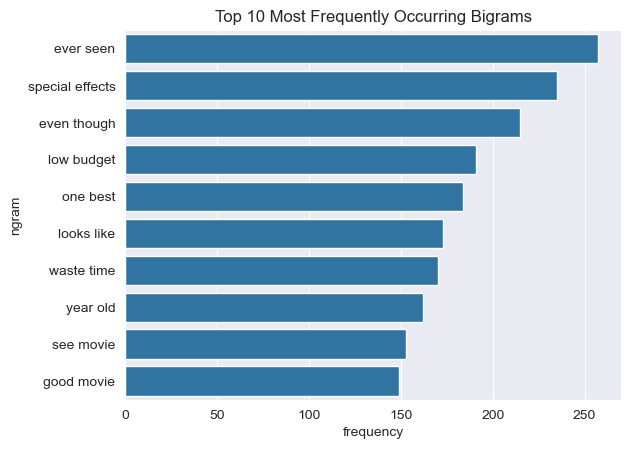

In [29]:
sns.barplot(x = ngram_freq['frequency'][:10], y = ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occurring Bigrams')
plt.show()

In [30]:
cv1 = CountVectorizer(ngram_range = (3, 3))
trigrams = cv1.fit_transform(review_df['review'])
count_values = trigrams.toarray().sum(axis = 0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "trigrams"]

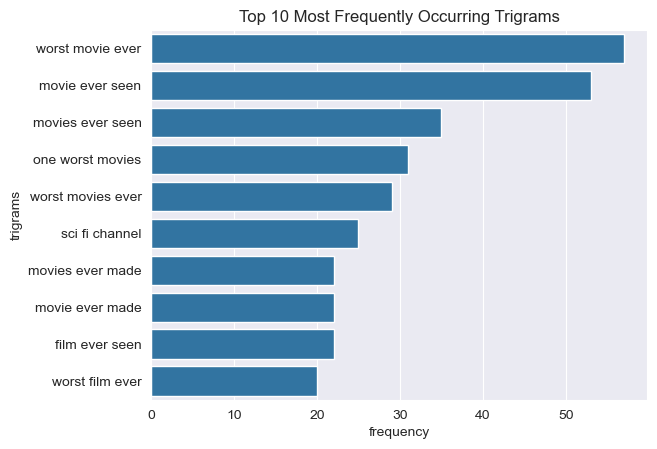

In [31]:
sns.barplot(x = ngram_freq['frequency'][:10], y = ngram_freq['trigrams'][:10])
plt.title('Top 10 Most Frequently Occurring Trigrams')
plt.show()

## Vectorization (TF-IDF)
- TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical method to evaluate how important a word is to a document in relation to a larger collection of documents.
- It combines both Term Frequency and Inverse Document Frequency components.
- Will be used in the Multinomial Naive Bayes Model

In [32]:
tfidf = TfidfVectorizer(ngram_range = (1, 3))
X = tfidf.fit_transform(corpus)

# **Data Splitting and Model Training**

## Baseline Model: Multinomial Naive Bayes

In [ ]:
# MNB = MultinomialNB()
# MNB.fit(X_train, y_train)

# y_pred = MNB.predict(X_test)

# accuracy = accuracy_score(y_pred, y_test)

# print(f"Multinomial Naive Bayes accuracy: {accuracy * 100}%")
# print("-" * 50)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

Multinomial Naive Bayes accuracy: 85.5%
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       506
           1       0.84      0.88      0.86       494

    accuracy                           0.85      1000
   macro avg       0.86      0.86      0.85      1000
weighted avg       0.86      0.85      0.85      1000



0.93371045430542


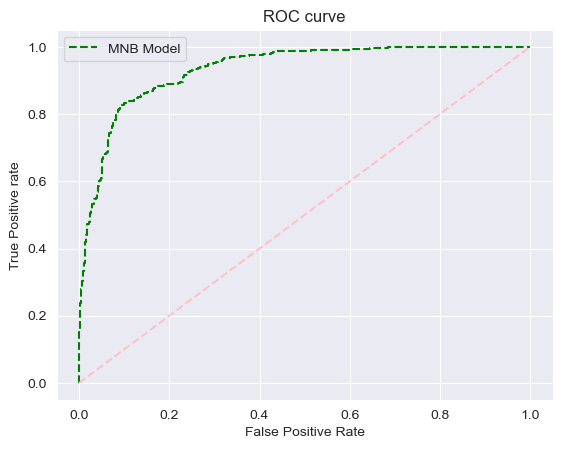

In [ ]:
# from sklearn.metrics import roc_curve

# # predict probabilities for CNB, MNB, BNB models:
# MNB_prob = MNB.predict_proba(X_test)

# # roc curve for models
# fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)

# # roc curve for tpr = fpr
# random_probs = [0 for i in range(len(y_test))]
# p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# # auc scores
# from sklearn.metrics import roc_auc_score
# auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
# print(auc_MNB)

# # plot roc curves
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
# plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# plt.title('ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive rate')

# plt.legend(loc='best')
# plt.show();

## Advanced Model
LSTM (Long Short-Term Memory)
- A specialized type of Recurrent Neural Network designed to learn long term dependencies in sequential data
- Can retain context over longer sequences

BERT (Bidirectional Representation for Transformers):
- A technique that can improve how well computers comprehend human language.
- Exploits bidirectional context to acquire complex and insightful word and phrase representations.

### LSTM (Long Short-Term Memory)

In [33]:
from collections import Counter

# Build the vocabulary using Review_lists
word_counter = Counter()
for tokens in review_df['Review_lists']:
    word_counter.update(tokens)

MAX_VOCAB_SIZE = 20000
most_common = word_counter.most_common(MAX_VOCAB_SIZE - 2)

In [34]:
# Index mapping
word2idx = {"<PAD>": 0, "<UNK>": 1}
for word, _ in most_common:
    word2idx[word] = len(word2idx)

In [35]:
def encode_review(tokens, word2idx):
    return [word2idx.get(word, word2idx["<UNK>"]) for word in tokens]

sequences = review_df['Review_lists'].apply(lambda x: encode_review(x, word2idx))

In [36]:
%pip install torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset


Note: you may need to restart the kernel to use updated packages.


In [37]:
Max_len = 200

def pad_sequence(seq, max_len):
    if len(seq) < max_len:
        return seq + [0] * (max_len - len(seq))
    else:
        return seq[:max_len]
    

X = torch.tensor([pad_sequence(seq, Max_len) for seq in sequences], dtype = torch.long)
y = torch.tensor(review_df['sentiment'].values, dtype = torch.float)

In [38]:
from torch.utils.data import Dataset

class ReviewDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

Data Splitting: 72/18/10

In [39]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1, stratify = y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.2, random_state = 42, stratify = y_temp)

Dataloaders and Batching

In [40]:
train_dataset = ReviewDataset(X_train, y_train)
val_dataset = ReviewDataset(X_val, y_val)
test_dataset = ReviewDataset(X_test, y_test)

In [41]:
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 64, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size = 64, shuffle = False)

In [49]:
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim = 64, hidden_dim = 256, n_layers = 2, drop_prob = 0.5):
        super().__init__()
        self.output_size = output_size
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        # Embedding and LSTM Layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout = drop_prob, batch_first = True)
        
        # Dropout Layer
        self.dropout = nn.Dropout(0.3)
        
        # Linear and sigmoid layer
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # Dropout and Fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        sig_out = self.sigmoid(out)
        
        # Reshape
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1]
        
        return sig_out, hidden
    
    def lstm_hidden(self, batch_size):
        h0 = torch.zeros((self.n_layers, batch_size, self.hidden_dim)).to(device)
        c0 = torch.zeros((self.n_layers, batch_size, self.hidden_dim)).to(device)
        hidden = (h0, c0)
        return hidden
        

In [51]:
vocab_size = len(word2idx)
output_size = 1

model = SentimentLSTM(vocab_size, output_size, embedding_dim = 64, hidden_dim = 256, n_layers = 2, drop_prob = 0.5)
lr = 0.001
criterion = nn.BCELoss() # Loss Function
optimizer = torch.optim.Adam(model.parameters(), lr)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(model)

SentimentLSTM(
  (embedding): Embedding(20000, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [53]:
EPOCH = 10
for epoch in range(EPOCH):
    
    # Train loop
    model.train()
    train_loss = 0.0
    
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        # Initialize hidden state per batch
        hidden = model.lstm_hidden(X_batch.size(0))
        hidden = tuple(h.detach() for h in hidden)
        
        optimizer.zero_grad()
        
        outputs, hidden = model(X_batch, hidden)
        
        
        loss = criterion(outputs, y_batch)
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 5)
        
        optimizer.step()
        
        train_loss += loss.item()
        
    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            hidden = model.lstm_hidden(X_batch.size(0))
            
            outputs, hidden = model(X_batch, hidden)
            loss = criterion(outputs, y_batch)
            
            val_loss += loss.item()
            
            preds = (outputs >= 0.5).float()
            correct += (preds == y_batch).sum().item()
    
    val_acc = correct / len(val_dataset)
    
    print(
        f"Epoch {epoch+1}/{EPOCH} | "
        f"Train Loss: {train_loss/len(train_loader):.4f} | "
        f"Val Loss: {val_loss/len(val_loader):.4f} | "
        f"Val Acc: {val_acc:.4f}"
    )

Epoch 1/10 | Train Loss: 0.6895 | Val Loss: 0.6924 | Val Acc: 0.5044
Epoch 2/10 | Train Loss: 0.6633 | Val Loss: 0.7165 | Val Acc: 0.5078
Epoch 3/10 | Train Loss: 0.6371 | Val Loss: 0.7511 | Val Acc: 0.5044
Epoch 4/10 | Train Loss: 0.6183 | Val Loss: 0.7684 | Val Acc: 0.5033
Epoch 5/10 | Train Loss: 0.6078 | Val Loss: 0.8402 | Val Acc: 0.5144
Epoch 6/10 | Train Loss: 0.6022 | Val Loss: 0.8782 | Val Acc: 0.5033
Epoch 7/10 | Train Loss: 0.6142 | Val Loss: 0.8318 | Val Acc: 0.5089
Epoch 8/10 | Train Loss: 0.6000 | Val Loss: 0.8583 | Val Acc: 0.5033
Epoch 9/10 | Train Loss: 0.6001 | Val Loss: 0.8793 | Val Acc: 0.4922
Epoch 10/10 | Train Loss: 0.5963 | Val Loss: 0.8867 | Val Acc: 0.5089


Model Evaluation

In [72]:
def evaluate_accuracy(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            hidden = model.lstm_hidden(X_batch.size(0))
            outputs, _ = model(X_batch, hidden)
            
            preds = (outputs >= 0.5).float()
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)
            
    return correct / total

In [73]:
val_acc = evaluate_accuracy(model, val_loader)
test_acc = evaluate_accuracy(model, test_loader)

print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Validation Accuracy: 0.5089
Test Accuracy: 0.5200


Model Testing

In [74]:
def encode_review(tokens, word2idx):
    return [word2idx.get(word, word2idx["<UNK>"]) for word in tokens]

def pad_sequence(seq, max_len):
    if len(seq) < max_len:
        return seq + [0] * (max_len - len(seq))
    return seq[:max_len]

def tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    return text.split()

In [75]:
def predict_sentiment(text, model, word2idx, max_len = 200):
    model.eval()
    
    tokens = tokenize(text)
    encoded = encode_review(tokens, word2idx)
    padded = pad_sequence(encoded, max_len)
    
    X = torch.tensor([padded], dtype = torch.long).to(device)
    
    with torch.no_grad():
        hidden = model.lstm_hidden(1)
        outputs, _ = model(X, hidden)
        
        prob = outputs.item()
        sentiment = "positive" if prob >= 0.5 else "negative"
    
    return sentiment, prob

In [79]:
text = "The food was disgusting and I will not be coming here again."

sentiment, confidence = predict_sentiment(text, model, word2idx, Max_len)

print(f"Sentiment: {sentiment}")
print(f"Confidence: {confidence:.4f}")

Sentiment: negative
Confidence: 0.4887
